In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = None

### Ejercicio 1:
¿Sobre que columnas podremos eliminar o reemplazar los outliers?

In [5]:
df = pd.read_csv("attacks_limpieza_2.csv", index_col = 0)
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date,age_new
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, all onboard were killed by sharks",1800,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,Reported May-28-1797,NaN
2,1792.09.12,1792,Provoked,england,NaN,On the Thames River,Fishing,male,M,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, PROVOKED INCIDENT",12-Sep-1792,NaN
3,1791.00.00,1791,Unprovoked,australia,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, ""bitten in two""",1791,NaN
4,1788.05.10,1788,Boat,australia,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"No injury to occupants, shark bit oar and rudder",10-May-1788,NaN


<font color='violet'>Seleccionamos las columnas con valores numéricos ya que serán las que tendrán outliers.

In [6]:
df_numericas = df.select_dtypes(include=np.number)

In [7]:
df_numericas.head(2)

,year,age_new
0,1800,NaN
1,1797,NaN


### Ejercicio 2:
Identifica visualmente los outliers

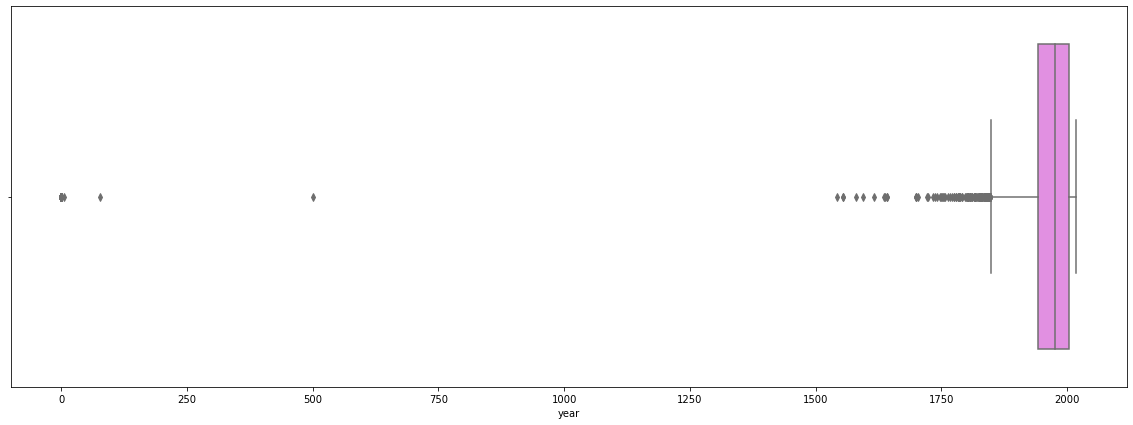

In [8]:
plt.subplots(figsize=(20,7))
sns.boxplot(x='year', data=df_numericas, color='violet');

### Ejercicio 3:
Identifica sobre el dataframe las filas que son outliers

<font color='violet'> La columna 'year' es la única sobre la que podemos detectar valores outliers. En el boxplot podemos ver que la mayor parte de los ataques ocurren entre los años 1900 y 2000. También observamos que tenemos fechas del año 0 o del 500. También hay ataques que datan entre los años 1500 y 1700. 

Como estos outliers no parece que tengan mucha fiabilidad vamos a eliminarlos. Para ello haremos una funcion que calcule los percentiles y el IQR, y luego eliminaremos aquellos valores que sobresalgan de estos límites. Realizaremos otro boxplot para ver cómo han quedado nuestros datos después de eliminar los outliers para examinarlos mejor.

In [9]:
def detectar_outliers(year, df): 
    
    dicc_indices = {}
    
    Q1 = np.nanpercentile(df[year], 25)
    Q3 = np.nanpercentile(df[year], 75)
        
    IQR = Q3 - Q1
        
    limites_outliers = 1.5 * IQR
        
    datos_outliers = df[(df[year] < Q1 - limites_outliers) | (df[year] > Q3 + limites_outliers)]
        
        
    if datos_outliers.shape[0] > 0:  
        
        dicc_indices[year] = (list(datos_outliers.index)) 
        

    
    return dicc_indices 

In [10]:
ind = detectar_outliers('year', df)

In [11]:
print(ind)

{'year': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 6192, 6193, 6194, 6195, 6196, 6197, 6198, 6199, 6200, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6214, 6215, 6216, 6216, 6217, 6218, 6219, 6220, 6221, 6222, 6223, 6224, 6225, 6226, 6227, 6228, 6229, 6230, 6231,

<font color='violet'> Extraemos creamos un diccionario con los índices de los valores que son outliers.

### Ejercicio 4:
Reemplaza los outliers por el estadístico más correcto.

In [12]:
for k, v in ind.items():
    media = df[k].mean()
    for i in v: 
        df.loc[i,k] = media

In [13]:
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date,age_new
0,1800.00.00,1927.133059,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, all onboard were killed by sharks",1800,NaN
1,1797.05.28.R,1927.133059,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,Reported May-28-1797,NaN
2,1792.09.12,1927.133059,Provoked,england,NaN,On the Thames River,Fishing,male,M,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, PROVOKED INCIDENT",12-Sep-1792,NaN
3,1791.00.00,1927.133059,Unprovoked,australia,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, ""bitten in two""",1791,NaN
4,1788.05.10,1927.133059,Boat,australia,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"No injury to occupants, shark bit oar and rudder",10-May-1788,NaN


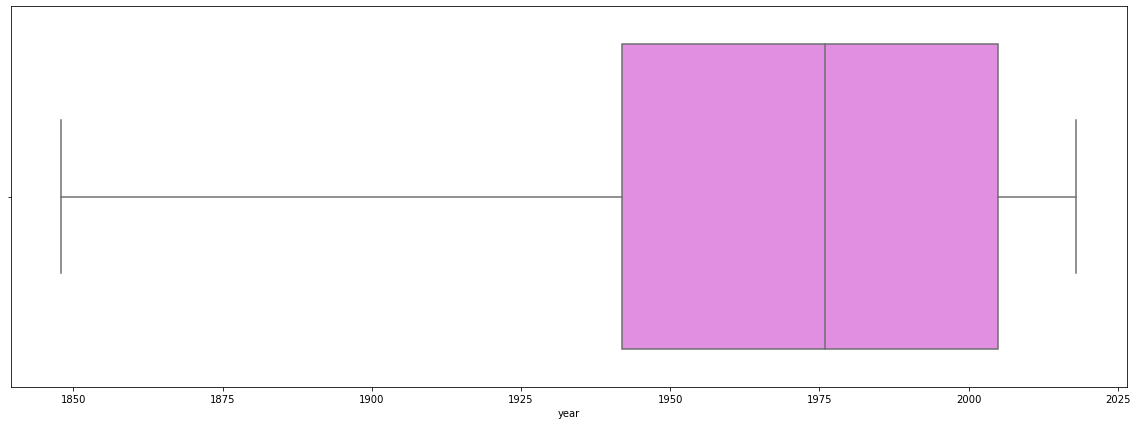

In [14]:
plt.subplots(figsize=(20,7))
sns.boxplot(x='year', data=df, color='violet');

### Ejercicio 5:
Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio.

In [15]:
df.to_csv('attacks_columnas_limpias.csv')